## <hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Logistic Regression

<hr/>

### Classification Methods

- $k$-Nearest Neighbors
- Naive Bayes
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Decision Trees
- Random Forests
- **Logistic Regresion**

<h1><font color="darkblue">Logistic Regression</font></h1>


### Generative classifiers

**What** makes a dog, **what** makes a cat?

<img src='https://upload.wikimedia.org/wikipedia/commons/8/88/Deutscher_Schaeferhund_Presley_von_Beluga.jpg' width=200 align=left>

<img src='https://upload.wikimedia.org/wikipedia/commons/e/ee/Domestic_cat_felis_catus.jpg' width=200 align=center>

Examples: Naive Bayes, LDA, QDA.

If $c_1,\ldots, c_K$ classes and $\mathbf{x}$ features vector, choose estimated class as $c_{k^*}$ with

> $\displaystyle k^* =  \mathrm{arg}\max_k \left\{p(c_k)\,p(\mathbf{x} \lvert c_k)\right\},\quad\quad$ where

$ p(c_k) = \pi(c_k)$ is prior, <br>
$ p(x \lvert c_k) = {\cal{}L}\!_\mathbf{x}(c_k)$ is likelihood.

### Discriminative classifer

Does **not create a model** for dogs or cats, but tries only to **discriminate** (or, find the difference) between the classes: <br> 
Choose class as $c_{k^*}$ with

> $\displaystyle k^* =  \mathrm{arg}\max_k p(c_k \lvert \mathbf{x}),$

after having built models for the $p(c_k \lvert \mathbf{x})$ for $k=1,\ldots ,K$.

Example: <font color="darkblue">Logistic Regression</font>

#### Goal of Logistic Regression:

Find _linear_ model that meaningfully learns the $\{p(c_k \lvert \mathbf{x})\}_{k=1}^K$ from data.

## Binary Logistic Regression

Setting: We have $K=2$ classes $c_1$ and $c_2$ (only cats vs. dogs).

### Is linear regression an option for classification problems?

Can we just use _linear regression_ to model the class probabilities such that

> $p(c_2 \lvert \mathbf{x}) =  \beta_1^T \mathbf{x} + \beta_0  = \begin{bmatrix} \mathbf{x}^T & 1 \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_0 \end{bmatrix}$.

We write $\tilde{\beta} = \begin{bmatrix} \beta_1 \\ \beta_0 \end{bmatrix}$.

If $f(\mathbf{x};\beta) = \beta_1 \mathbf{x} + \beta_0$ <br> 
and $\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n$ dataset, with training labels $y_1,\ldots,y_n$, obtain estimate $\hat{\beta}$ for $\beta$ such that

>$\displaystyle \hat{\beta} = \arg\min_{\beta} \sum_{i=1}^n \big(y_i-f(\mathbf{x}_i;\beta)\big)^2$

Features:  (100, 1)
Target:  (100,)


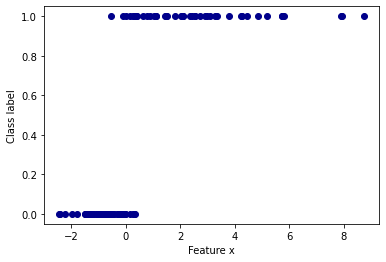

In [11]:
# Generate simple dataset with two classes.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


n_samples = 100
x = norm.rvs(size=n_samples,random_state=436)
y = (x > 0).astype(np.float)
x[x > 0] *= 4
x += .3 * np.random.normal(size=n_samples)
x = x[:, np.newaxis]

print('Features: ', x.shape)
print('Target: ', y.shape)
plt.scatter(x, y, color='darkblue');
plt.xlabel("Feature x")
plt.ylabel("Class label")
plt.show()

Recall: How to compute the solution of linear regression model.

If $\mathbf{y}= (y_1,\ldots,y_n)$ and $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1 & 1  \\ \mathbf{x}_2 & 1 \\ \vdots \\ \mathbf{x}_n & 1  \end{bmatrix}$, compute  

> $\hat\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} = \mathbf{X}^+ y$

(or $\mathbf{X}^+$ if you have access to Moore-Penrose inverse $\mathbf{X}^+$).

Estimated beta_0:  0.3225135429604421
Estimated beta_1:  0.15799266323668057


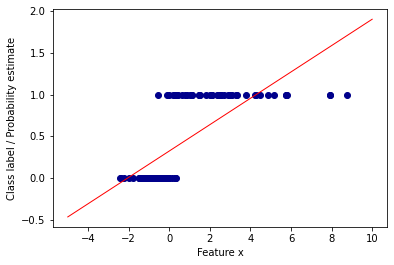

In [12]:
import matplotlib.pyplot as plt
#### Fit a linear regression model
# append column of ones
XX = np.ones((x.shape[0], 2))
XX[:,1] = x.ravel() # flattened array
bHat = np.linalg.inv(XX.T.dot(XX)).dot(XX.T).dot(y) # find linear regression line
b0, b1 = bHat
print('Estimated beta_0: ', b0)
print('Estimated beta_1: ', b1)

X_test = np.linspace(-5, 10, 300)
plt.plot(X_test, b1 * X_test + b0, linewidth=1,color='red');
plt.scatter(x, y, color='darkblue');
plt.xlabel("Feature x")
plt.ylabel("Class label / Probability estimate")
plt.show()

Problem: Linear function exceeds $+1$ and goes below $0$. This will **never** model a probability well (since $0 \leq p(c_2 \lvert \mathbf{x}) \leq 1$ for all $\mathbf{x}$)!

#### Make assumption:
> $\log \dfrac{p(c_1 \lvert \mathbf{x})}{p(c_2 \lvert \mathbf{x})} = \beta_1^T \mathbf{x} + \beta_0 $

Calculation shows: This is equivalent to

> $ p(c_1 \lvert \mathbf{x}) = \dfrac{\exp(\beta_1^T \mathbf{x} + \beta_0)}{1+ \exp(\beta_1^T \mathbf{x} + \beta_0)} = \sigma(\beta_1^T \mathbf{x} + \beta_0)$

where $\sigma: \mathbf{R} \to \mathbf{R}$ is called **sigmoid** funciton,
> $ \displaystyle \sigma(t) = \frac{1}{1+e^{-t}} = \frac{e^t}{1+e^t}.$

Importantly,  $0 < \sigma(t) < 1 $.

Inverse function of sigmoid $\sigma$: _Logit_ function

> $ \displaystyle \text{logit}(p) = \log \left( \frac{p}{1-p} \right) \qquad 0 < p < 1 $

#### Exploring the Sigmoid function.
Plot the function $\mathbf{x} \to \sigma(\beta_1^T \mathbf{x} + \beta_0)$  for various values of $\beta_0$ and $\beta_1$ to see how changing $\beta_0$ and $\beta_1$ impact the curve.

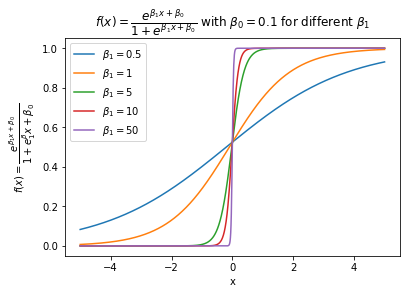

In [13]:
xax0 = np.linspace(-5, 5, 1000)
beta0 = 0.1
logisticfct = lambda x, beta0, beta1: np.exp(beta0+beta1*x)/(1+np.exp(beta0+beta1*x))
#plt.figure(figsize=(10,8))

betas1 = [0.5,1,5,10,50]
legendlist = []
for beta1 in betas1:
    plt.plot(xax0,logisticfct(xax0,beta0,beta1))
    legendlist.append(r'$\beta_1 = '+str(beta1)+'$')
#plt.plot(x,logisticfct(x,beta0,beta1))
plt.xlabel('x')
plt.ylabel(r'$f(x) = \dfrac{e^{\beta_1 x + \beta_0}}{1 + e^\beta_1 x + {\beta_0}}$')
plt.title(r'$f(x) = \dfrac{e^{\beta_1 x + \beta_0}}{1 + e^{\beta_1 x + \beta_0}}$ with $\beta_0 = 0.1$ for different $\beta_1$')
plt.legend(legendlist)
plt.show()

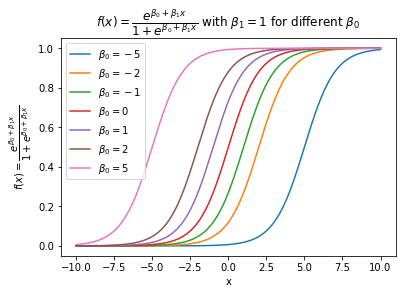

In [14]:
beta1 = 1
betas0 = [-5,-2,-1,0,1,2,5]
legendlist = []
xax = np.linspace(-10, 10, 1000)
for beta0 in betas0:
    plt.plot(xax,logisticfct(xax,beta0,beta1))
    legendlist.append(r'$\beta_0 = '+str(beta0)+'$')
#plt.plot(x,logisticfct(x,beta0,beta1))
plt.xlabel('x')
plt.ylabel(r'$f(x) = \dfrac{e^{\beta_0+\beta_1 x}}{1 + e^{\beta_0+\beta_1 x}}$')
plt.title(r'$f(x) = \dfrac{e^{\beta_0+\beta_1 x}}{1 + e^{\beta_0+\beta_1 x}}$ with $\beta_1 =1$ for different $\beta_0$')
plt.legend(legendlist)
plt.show()

- Model Assumption of Binary Logistic Regression

Given model parameters $\beta = (\beta_1,\beta_0)$,

> $ y \sim Bernoulli(\pi(\mathbf{x};\beta))$ where $ \pi(\mathbf{x};\beta) = \mathbb{P}(c_1 \ | \ X = \mathbf{x},\beta) $

> $ \displaystyle \text{logit} \left[ \pi(\mathbf{x};\beta) \right] = \log \left[ \frac{\pi(\mathbf{x};\beta)}{1-\pi(\mathbf{x};\beta)} \right] = \beta_1^T \mathbf{x} + \beta_0 \qquad $ or $ \displaystyle \qquad \pi(\mathbf{x};\beta) = \sigma(\beta_1^T \mathbf{x} + \beta_0)$

- Fitting: Maximum likelihood estimator (MLE)

Given training dataset $T = \big\{ (\mathbf{x}_i, y_i) \big\}_{i=1}^n$ (where $\mathbf{x}_i\in \mathbb{R}^d$ and $y_i$ is the known class membership), we can compute the

> Likelihood function:

$$ \mathcal{L}(\beta) = \prod_{i=1}^n \pi(\mathbf{x}_i; \beta)^{y_i} (1-\pi(\mathbf{x}_i; \beta))^{1-y_i} $$

> Log-likelihood function:
$$
\begin{aligned}
l(\beta) = \log \mathcal{L}(\beta) &= \sum_{i=1}^{n} \left[y_i \log \pi(\mathbf{x}_i; \beta) + (1-y_i) \log(1-\pi(\mathbf{x}_i; \beta)) \right]\\
&= - L_{\log}\left(\mathbf{y}, (\pi(\mathbf{x}_i; \beta))_{i=1}^n\right)
\end{aligned}
$$

In the latter equality, we wrote $\mathbf{y} = (\mathbf{y}_1,\ldots,\mathbf{y}_n)$. <br>
$L_{log}(\mathbf{y},\mathbf{p})$ is called the **logistic loss** or **cross entropy loss** (not commutative!).

See also: [sklearn.metrics.log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

By maximizing the log-likelihood function (or minimizing the cross entropy loss), we obtain the

> Maximum Likelihood Estimator (MLE):

$$ \widehat{\beta} = \arg \max_{\beta} l(\beta) $$

> **Important**: Unlike for linear regression, there is no _closed-form_ solution! <br>
But we can use **optimization** to compute $\widehat{\beta}$ numerically.

- Predicted probability obtained from MLE estimate: If $\widehat{\beta} = (\widehat{\beta}_1,\widehat{\beta}_0)$,

> $ \displaystyle \widehat{\pi}(\mathbf{x}; \widehat{\beta}) = \sigma\left(\widehat{\beta}_1^T \mathbf{x} + \widehat{\beta}_0\right) = \frac{\exp \left( \widehat{\beta}_1^T \mathbf{x} + \widehat{\beta}_0\right)}{1 + \exp \left( \widehat{\beta}_1^T \mathbf{x} + \widehat{\beta}_0 \right) } $

Using a probability threshold $\theta$, for example $\theta = 0.5$, we obtain label estimate $\widehat{y}$ such that

> Let $\begin{cases}\widehat{y} = 1 \quad\text{if}\quad \widehat{\pi}(\mathbf{x}; \widehat{\beta}) \geq \theta\\ \widehat{y} = 0 \quad\text{if}\quad \widehat{\pi}(\mathbf{x}; \widehat{\beta}) < \theta \end{cases}$


### <span style="color:red">Note: Logistic regression is still a linear classifier!</span>

In `scikit-learn`, we can use [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to find logistic regression fits.

In [15]:
from sklearn.linear_model import LogisticRegression
# Fit a logistic regression model
clf = LogisticRegression(C=1e4) # Inverse of regularization strength.
clf.fit(x, y)

LogisticRegression(C=10000.0)

In [16]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
vars(clf)

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 10000.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 1,
 'classes_': array([0., 1.]),
 'coef_': array([[4.76649844]]),
 'intercept_': array([-1.00555416]),
 'n_iter_': array([12], dtype=int32)}

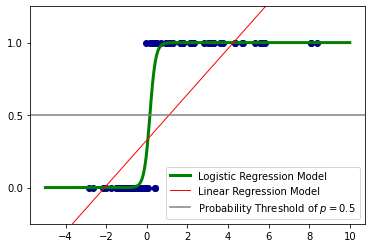

In [8]:
# Predict
prob = Sigmoid(clf.intercept_ + clf.coef_ * X_test).ravel()

# Plot the result
plt.plot(X_test, prob, color='green', linewidth=3)
plt.plot(X_test, b0 + b1 * X_test, color='red', linewidth=1);
plt.scatter(x, y, color='darkblue');
plt.axhline(0.5, color='0.5');
plt.ylim(-0.25, 1.25);
plt.yticks([0, 0.5, 1]);
plt.legend(('Logistic Regression Model', 'Linear Regression Model','Probability Threshold of $p=0.5$'), loc='lower right');

### Fitting Logistic Regression Models

As the MLE $\tilde{\beta}$ (which is also the _minimizer_ of the logistic loss $L_{\log}\left(\mathbf{y}, (\pi(\mathbf{x}_i; \beta))_{i=1}^n\right)$ above) has no closed form, we resort to iterative optimization methods.

Two types of methods:

  - **(Stochastic) Gradient Descent:** See whiteboard.
  - **Newton-Raphson/ Iteratively Reweighted Least Squares (IRLS)**

See Section 7.6 of [Theodoridis, “Machine Learning: A Bayesian and Optimization Perspective”, Academic Press, 2nd Edition, 2020 (PDF available via JHU Library)](https://www.sciencedirect.com/book/9780128188033/machine-learning) for more detailed explanations.

For $K=2$ case let $p_1(x;\beta) = p(x;\beta)$, then $p_2(x;\beta) = 1-p(x;\beta)$.

Rewrite features as $x_i' = (1,x_i)$, then loglikelihood is
\begin{equation}
\ell(\beta) = \sum_{i=1}^n \big(y_i\beta^\top x_i' - \log(1+\exp{\beta^\top x_i'})\big)
\end{equation}

Set $\frac{\partial\ell(\beta)}{\partial\beta} = \sum_{i=1}^n x_i'(y_i - p(x_i;\beta)) = 0$ and solve for $\beta$.

Not-solvable in closed form; use Newton-Raphson to approximate solution:

0. Initialize $\beta^{\text{old}} = \beta^0$.
1. Compute $\beta^{\text{new}} = \beta^{\text{old}} - \bigg\lbrack\big(\frac{\partial^2\ell(\beta)}{\partial\beta\partial\beta^\top}\big)^{-1} \frac{\partial\ell(\beta)}{\partial\beta}\bigg\rbrack\bigg |_{\beta=\beta^{\text{old}}}$
2. Set $\beta^{\text{old}}=\beta^{\text{new}}$.
3. Repeat steps 1 and 2 until convergence.

Define $\boldsymbol y = (y_1,\dots,y_n)^\top$

$\boldsymbol X\in\mathbb{R}^{n\times(d+1)}$ design matrix

$\boldsymbol p = (p(x_1;\beta^{\text{old}}),\dots,p(x_n;\beta^{\text{old}}))$

$\boldsymbol W = \text{diag}(\boldsymbol p(1-\boldsymbol p))^\top$

Can show that
\begin{align}
\frac{\partial\ell(\beta)}{\partial\beta}\bigg|_{\beta=\beta^{\text{old}}} &= \boldsymbol X(\boldsymbol y - \boldsymbol p)\\
\frac{\partial^2\ell(\beta)}{\partial\beta\partial\beta^\top}\bigg|_{\beta=\beta^{\text{old}}} &= -\boldsymbol{X^\top WX}
\end{align}

Therefore the NR update is $\beta^{\text{new}} = (\boldsymbol{X^\top WX})^{-1}\boldsymbol{X^\top W}(\boldsymbol X\beta^{\text{old}}+ \boldsymbol W^{-1}(\boldsymbol y - \boldsymbol p))$

### Multiclass Logistic Regression

Everything can be generalized to $K > 2$:

$\mathbf{x}_i$ are $d$-dimensional features

$y_i\in\{1,\dots,K\}$ are classes.

Want posterior probabilities to all be positive and sum to 1 for each value of the features.

Specify $K-1$ log-odds ratios
\begin{align}
\log\frac{P(Y=1\ | \ X=x)}{P(Y=K\ | \ X=x)} &= \beta_1^\top x + \beta_{10}\\
\log\frac{P(Y=2\ | \ X=x)}{P(Y=K\ | \ X=x)} &= \beta_2^\top x + \beta_{20}\\
&\vdots\\
\log\frac{P(Y=K-1\ | \ X=x)}{P(Y=K\ | \ X=x)} &= \beta_{K-1}^\top x + \beta_{(K-1)0}\\
\end{align}

Classification rule is $G(x) = \text{arg}\max_{k\in\lbrack K\rbrack}\log\frac{P(Y=k\ | \ X=x)}{P(Y=K\ | \ X=x)}$

Under this formulation, one can show
\begin{align}
P(Y=k | X=x) = &\frac{\exp\{\beta_k^\top x + \beta_{k0}\}}{1 +\sum_{l=1}^{K-1}\exp\{\beta_l^\top x + \beta_{l0}\}}, \ k < K\\
P(Y=K | X=x) = &\frac{1}{1 +\sum_{l=1}^{K-1}\exp\{\beta_l^\top x + \beta_{l0}\}}
\end{align}

which clearly sum to 1 and are all positive.

Let $\beta = (\beta_{01},\dots,\beta_{(K-1)0}, \beta_1^\top,\dots,\beta_{K-1}^\top)$, and write $P(Y=k | X=x) = p_k(x;\beta)$.

### Implementation Examples

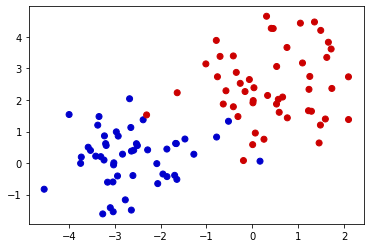

In [21]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
# Generate 100 not perfectly separable points
x, y = datasets.make_blobs(n_samples=100, centers=2, random_state=3, center_box = (-6.0,6.0))
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
plt.scatter(x[:,0], x[:,1], c=y,cmap=cmap_bold,alpha=1);

In [22]:
def classification_map(X,y,classifier,i=0,j=1,X_test=None,y_test=None,h=0.1):
    '''
    h: step size in the mesh
    i: first feature number to be plotted
    j: second feature number to be plotted
    '''
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
# Points in a mesh of [x_min, m_max] x [y_min, y_max]
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    classifier.fit(X,y)
    Z = classifier.predict(grid)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    # Plot also the training points
    plt.scatter(X[:,i], X[:,j], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with classifier "+str(classifier))
    if not X_test is None and not y_test is None: # if test set features are provided, overlay classified labels on test set as well
        plt.scatter(X_test[:,i], X_test[:,j], c=y_test,cmap=cmap_bold,marker="x")
    ax=plt.gca()
    #ax.legend(["training data","test data"],loc=0,fontsize=8)

In [23]:
# Fit a logistic regression model to "blob" data
clf = LogisticRegression(C=1)
clf.fit(x, y)

LogisticRegression(C=1)

In [24]:
# Generate data for decision boundary
h = 0.02
x_min, x_max = x[:,0].min() - 0.5, x[:,0].max() + 0.5
y_min, y_max = x[:,1].min() - 0.5, x[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

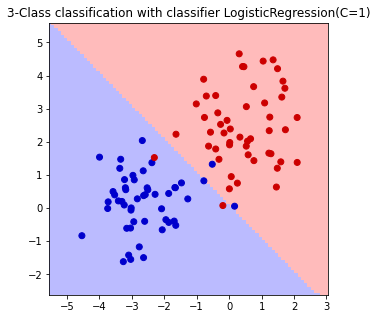

In [13]:
classification_map(x,y,clf)

In [25]:
# revisit our good old Iris data set
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.2,stratify=y)

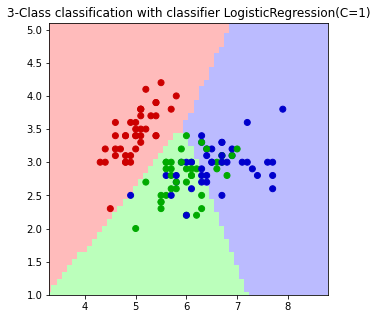

In [27]:
features = [0,1]
clfirls = LogisticRegression(C=1)
classification_map(X_train[:,features],y_train,clfirls)

#### Unhomework

  - Evaluate training and test accuracy of logistic regression classifier in Iris dataset, based on 
       - 2 features (try the different pairs),
       - all four features. <br>
       
    How does it compare to the other classifiers?